In [1]:
# ls

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('wave1_imm_dummies_2classes.csv', header=0, na_values=' ', index_col=0)
data.head()

,H1GI20,H1DA8,H1DA9,H1DA10,H1GH1,H1GH28,H1GH42,H1GH44,H1GH46,H1GH59A,...,BST90P13_3,BST90P24_1,BST90P24_2,BST90P24_3,BST90P24_4,BST90P24_5,BST90P24_6,BST90P26_1,BST90P26_2,BST90P26_3
AID,,,,,,,,,,,,,,,,,,,,,
57101310,11,33,4.0,0,4,5,4,5,5,6,...,0,0,0,0,0,0,1,0,0,1
57109625,8,14,7.0,3,1,2,2,4,4,5,...,0,0,1,0,0,0,0,0,0,1
57111071,8,35,12.0,2,2,4,3,3,3,5,...,0,0,1,0,0,0,0,0,0,1
57113943,9,10,5.0,4,3,4,3,4,5,6,...,1,0,1,0,0,0,0,1,0,0
57117542,9,0,0.0,0,2,3,4,4,4,6,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(4539, 499)

In [5]:
data.C_CRP.value_counts()

1.0    2669
3.0    1870
Name: C_CRP, dtype: int64

#### Create CV Labels

In [6]:
data['cv_label'] = data.index

In [7]:
data.shape

(4539, 500)

In [8]:
# data.head()

In [9]:
target = data.C_CRP
target.head()

AID
57101310    3.0
57109625    1.0
57111071    1.0
57113943    3.0
57117542    3.0
Name: C_CRP, dtype: float64

In [10]:
del data['C_CRP']

In [11]:
del data['H1FP3_1']

In [12]:
del data['H1RE1_26']

In [13]:
del data['H1FP1_4']

In [14]:
del data['H1MP2_1']

In [15]:
del data['H1MP4_3']

In [16]:
del data['H1MP3_4']

In [17]:
del data['H1FP6_4']

In [18]:
del data['H1MP2_2']

In [19]:
del data['H1FP2_3']

In [20]:
del data['H1FP2_4']

In [21]:
del data['H1FP1_5']

In [22]:
del data['H1MP1_2']

In [23]:
del data['H1MP1_3']

In [24]:
del data['H1FP6_5']

In [25]:
del data['H1FP1_3']

In [26]:
del data['H1MP3_3']

In [27]:
del data['H1FP1_2']

In [28]:
del data['H1FP2_1']

#### Oversample to balance classes

In [29]:
# NB: If you use this you'll need to add the package first
# conda install -c glemaitre imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

In [30]:
ros = RandomOverSampler(random_state=7)

In [31]:
data_res, target_res = ros.fit_sample(data, target)

In [32]:
data_res.shape

(5338, 481)

In [33]:
target_res.shape

(5338,)

In [34]:
# Double check to make sure class counts have been balanced
unique, counts = np.unique(target_res, return_counts=True)
dict(zip(unique, counts))

{1.0: 2669, 3.0: 2669}

#### Create training and testing sets

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_res, target_res, test_size=0.2, random_state=7)#, stratify=target_res)

In [36]:
cv_labels_train = X_train[:,[480]]
cv_labels_test = X_test[:,[480]]

In [37]:
X_train = np.delete(X_train, -1, 1)
X_test = np.delete(X_test, -1, 1)

In [38]:
# data_res[:,[498]]

In [39]:
# cv_labels = data_res[:,[498]] #Create array of cv_labels

In [40]:
# cv_labels

In [41]:
# data_res = np.delete(data_res, -1, 1) #Delete cv_labels from data array

In [42]:
# data_res.shape

In [43]:
from sklearn.cross_validation import LabelKFold
from sklearn.cross_validation import cross_val_predict

/Users/davidscroggins/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Cross-Validate predictions on new dataset

In [44]:
lkf_train = LabelKFold(cv_labels_train, n_folds=10)
lkf_test = LabelKFold(cv_labels_test, n_folds=10)

In [45]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [46]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [47]:
predicted = cross_val_predict(treeclf, X_train, y_train, cv=lkf_train)

In [48]:
print(classification_report(y_train, predicted))

             precision    recall  f1-score   support

        1.0       0.55      0.63      0.59      2151
        3.0       0.56      0.48      0.52      2119

avg / total       0.56      0.56      0.55      4270



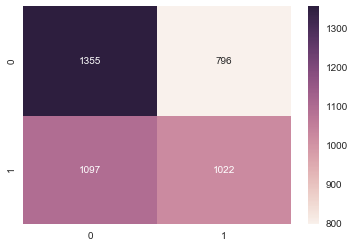

In [49]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
cm = confusion_matrix(y_train, predicted)
hm = sb.heatmap(cm, annot=True, fmt="d")

#### Use GridSearchCV to tune parameters

In [50]:
# from sklearn.model_selection import GridSearchCV

In [51]:
# treeGridSearch = tree.DecisionTreeClassifier()

In [52]:
# parameters = {
#     'criterion' : ['entropy', 'gini'],
#     'max_depth' : np.arange(1, 11, 3),
#     'min_samples_leaf' : np.arange(1, 102, 20),
#     'min_samples_split' : np.arange(2, 103, 20)
# }

In [53]:
# gs = GridSearchCV(treeGridSearch, parameters, verbose=1, cv=lkf_train, 
#                   n_jobs=-1, scoring='recall')

In [54]:
# %time _ = gs.fit(X_train, y_train)

In [55]:
# gs.best_params_

#### Test best parameters

In [56]:
# .57 min class, .57 precision, .56 recall overall
tree_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, 
                                       min_samples_leaf =1, 
                                       min_samples_split=22)

In [57]:
# # .54 min class, .57 precision, .56 overall
# tree_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=16, 
#                                        min_samples_leaf =1, 
#                                        min_samples_split=22)

In [58]:
tree_clf = tree_clf.fit(X_train, y_train)

In [59]:
# Repeat cross-validated testing
predicted = cross_val_predict(tree_clf, X_test, y_test, cv=lkf_test)

In [60]:
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

        1.0       0.56      0.62      0.59       518
        3.0       0.60      0.55      0.57       550

avg / total       0.58      0.58      0.58      1068



In [61]:
cd graphics

/Users/davidscroggins/Google Drive/DePaul/csc478_machineLearning/csc478_project/csc478_initialModels/graphics


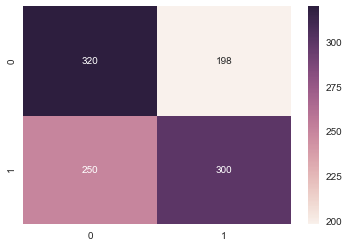

In [62]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
cm = confusion_matrix(y_test, predicted)
hm = sb.heatmap(cm, annot=True, fmt="d")
fig = hm.get_figure()
fig.savefig("heatMap_oversampling_imm_2classes")

In [63]:
#Get top 10 features
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1]
features_list = list(data)
top_indices = indices[:10]
for i in top_indices:
    print features_list[i]

H1GH28
BST90P17
BST90P25
H1RP4
H1JO9_0
H1TO41
H1TO31
BST90P03
BST90P09
H1RF1_3


#### Visualize tree

In [64]:
featureList = list(data)

In [65]:
from StringIO import StringIO
import pydotplus

In [66]:
tree.export_graphviz(tree_clf, out_file='tree.dot', feature_names=featureList)

In [67]:
dot_data = StringIO()
tree.export_graphviz(tree_clf, out_file=dot_data, feature_names=featureList)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('oversampling_imm_2classes2.png')

True